In [1]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnigns for clarity
import warnings
warnings.filterwarnings('ignore')

from plotting_utils import *
setup_formatting()

# configs

In [2]:
save_figs = False
mode = 'swimmer'
path_dir =  '../data/'

if 'swimmer' in mode: 
    save_folder = './swimmer_figs/'

    envs = ['SwimmerEnv_v3_Light_singleshot',
            'SwimmerEnv_v3_Light_singleshot',
            'SwimmerEnv_v3_Light_H40_alpha50_singleshot']

    base_env = 'SwimmerEnv_v3'

elif 'ant' in mode: 
    save_folder = './ant_figs_ss/'

    envs = [
            'AntEnv_v3_orig_singleshot',
            'AntEnv_v3_orig_H20_singleshot',
            'AntEnv_v3_orig_H20_alpha15_singleshot']

    base_env = 'AntEnv_v3'
    
elif 'cheetah' in mode: 
    save_folder = './cheetah_figs_ss/'

    envs = ['HalfCheetahEnv_v3_singleshot',
            'HalfCheetahEnv_v3_H10_singleshot',
            'HalfCheetahEnv_v3_H10_alpha5_singleshot']

    base_env = 'HalfCheetahEnv_v3'

methods = ['sac_orig','mppi','maxdiff'] 
plot_legend = ['SAC','NN-MPPI','MaxDiff']
num_colors = 3

## final x plots

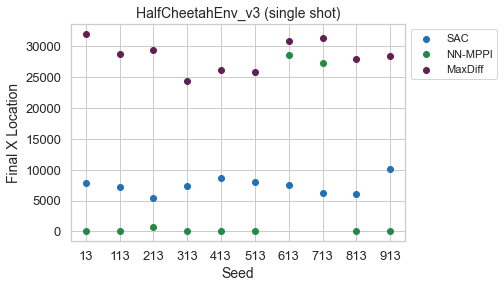

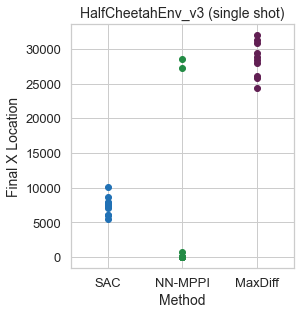

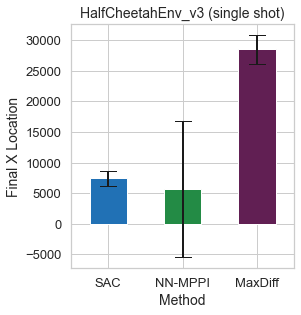

In [3]:
xlabs  = ['Seed','Method']
ylabs  = ['Final X Location']*2
          
for by_seed,xlab,ylab,title in zip([True,False],xlabs,ylabs,['BySeed','ByMethod']):
    for bar in [False,True]:
        if by_seed and bar: 
            break
        if by_seed:
            fig, axs = plt.subplots(1, 1)
        else: 
            fig, axs = plt.subplots(1, 1,figsize=(4,4.5))
        colors = {}
        colors['sac_orig'] = iter(sns.color_palette("Blues_r",n_colors=num_colors))
        colors['mppi'] = iter(sns.color_palette("Greens_r",n_colors=num_colors))
        colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=num_colors))
        for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
            data_path = path_dir + '{}/{}/'.format(method, env)
            seeds,data = load_final_data(data_path)
            if by_seed:
                axs.scatter(seeds,data,label=lgd,color=next(colors[method]))
            else:
                if bar:
                    axs.bar(env_idx*np.ones(len(data)),np.mean(data),yerr=np.std(data),color=next(colors[method]),width=0.5,capsize=8)
                else:
                    axs.scatter(env_idx*np.ones(len(data)),data,color=next(colors[method]))
            axs.tick_params(axis='both', which='major')

        axs.set_title(f'{base_env} (single shot)')
        axs.set_xlabel(xlab)
        axs.set_ylabel(ylab)
        if by_seed:
            axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
        else: 
            plt.xticks(ticks = np.arange(len(plot_legend)),labels=plot_legend)
            axs.set_xlim(-.5,2.5)
        if save_figs:
            plt.savefig(f'{save_folder}{base_env}_dist{title}{"_bar" if bar else ""}_singleshot.svg', bbox_inches='tight')
        plt.show()

## reward curves

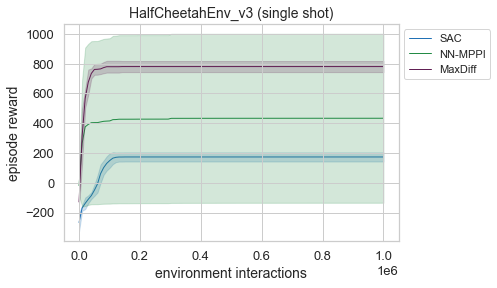

In [4]:
fill = True
plot_max = True

fig, axs = plt.subplots(1, 1)
colors = {}
colors['sac_orig'] = iter(sns.color_palette("Blues_r",n_colors=num_colors))
colors['mppi'] = iter(sns.color_palette("Greens_r",n_colors=num_colors))
colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=num_colors))
for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
    data_path = path_dir + '{}/{}/'.format(method, env)
    data = process_data(data_path,N=100,get_max=plot_max)
    plot_data(axs, data, lgd,color=next(colors[method]),fill=fill) 
    axs.tick_params(axis='both', which='major')

axs.set_title(f'{base_env} (single shot)')
axs.set_xlabel( 'environment interactions')
axs.set_ylabel('episode reward')
axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
if save_figs:
    title = 'max' if plot_max else 'mean'
    plt.savefig(f'{save_folder}{base_env}_{title}_singleshot.svg', bbox_inches='tight')
plt.show()